# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

# Topic : Hierarchical Clustering

## using numpy and scipy

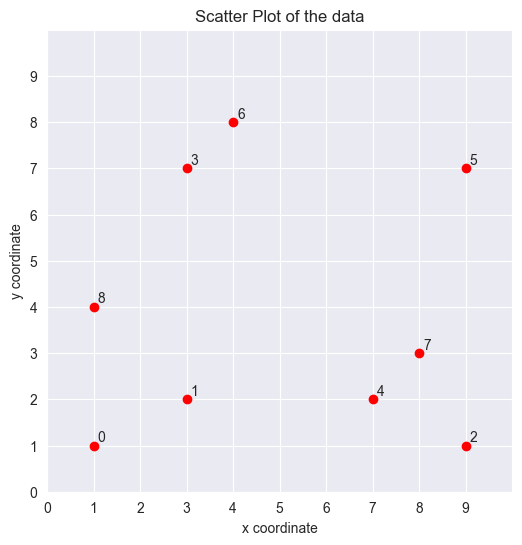

In [3]:
X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])
plt.figure(figsize=(6, 6))

plt.scatter(X1[:,0], X1[:,1], c='r')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i), xy=(X1[i,0], X1[i,1]), xytext=(3, 3), textcoords='offset points')
    
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()

plt.show()

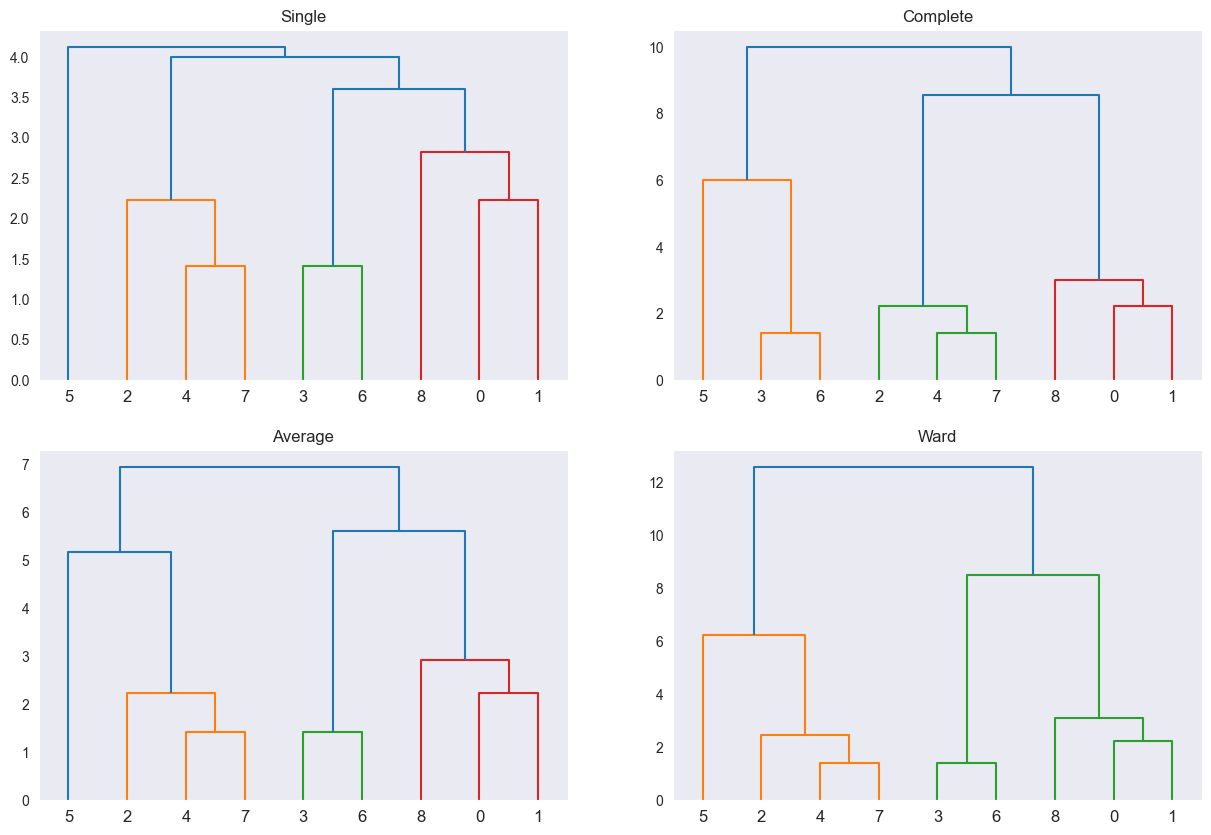

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X1, method='single', metric='euclidean')
Z2 = linkage(X1, method='complete', metric='euclidean')
Z3 = linkage(X1, method='average', metric='euclidean')
Z4 = linkage(X1, method='ward', metric='euclidean')

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

In [17]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(Z1, 5, criterion='maxclust')
f2 = fcluster(Z2, 3, criterion='maxclust')
f3 = fcluster(Z3, 3, criterion='maxclust')
f4 = fcluster(Z4, 2, criterion='maxclust')

print('Single:', f1)
print('Complete:', f2)
print('Average:', f3)
print('Ward:', f4)


Single: [3 3 1 2 1 5 2 1 4]
Complete: [3 3 2 1 2 1 1 2 3]
Average: [3 3 1 2 1 1 2 1 3]
Ward: [2 2 1 2 1 1 2 1 2]


## using scikit-learn

In [6]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X1)

print(Z1.labels_)

[0 0 1 0 1 1 0 1 0]


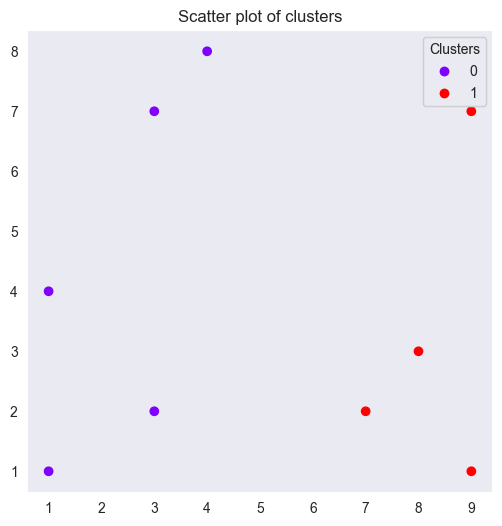

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X1[:,0], X1[:,1], c=Z1.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

## Real Dataset

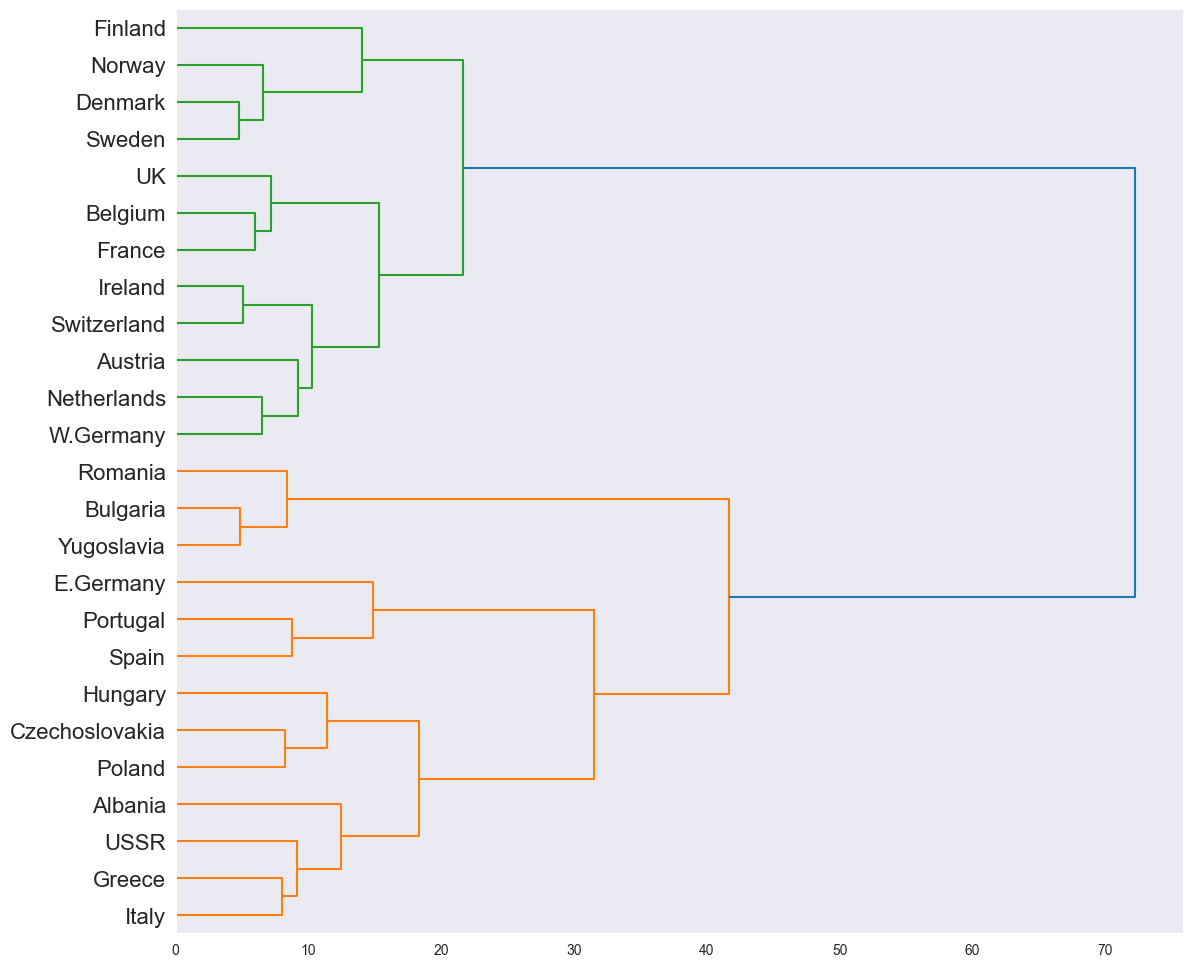

In [8]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
df.head()

X2 = df.iloc[:,1:10]

Z2 = linkage(X2, method='ward', metric='euclidean')

labelList = list(df['Country'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z2,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

In [9]:
df['Clusters'] = fcluster(Z2, 2, criterion='maxclust')

df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg,Clusters
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,2
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,1
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,1
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,2
